# Семинар наставника, АБД

## НИУ ВШЭ, 2024-25 учебный год

# Домашнее задание 4. Библиотеки Matplotlib, Seaborn

Задание выполнил(а):

**Трубкина Полина**

## Общая информация

__Внимание!__  

Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов. Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов.

Каждое задание весит 0.5 или 1 балл (указано рядом с номером задания). Всего в сумме можно получить, если правильно решить все задания, 10 баллов.

## Раздел 1. Визуализации в датасете кредитного скоринга

### О задании

Вы будете работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно исследовать с помощью средств визуализации.

*Описание данных*:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить – для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
GERMAN_CREDIT = 'https://github.com/evgpat/datasets/raw/refs/heads/main/german_credit.csv'

### Задание 1 (0.5 балла)

Используя `numpy` и `matplotlib`, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ на интервале от $-\pi$ до $\pi$, используя 100 точек. Добавьте легенду и сетку.. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

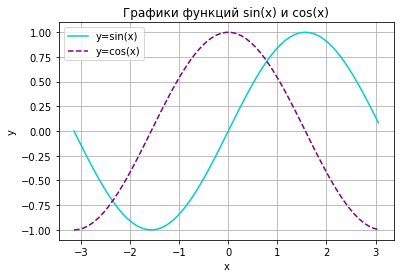

In [3]:
# ваш код здесь

x = np.arange(-np.pi, np.pi, 0.1) # массив со значениями от pi до pi

y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y_sin, label='y=sin(x)', color='darkturquoise')
plt.plot(x, y_cos, label='y=cos(x)', color='purple', linestyle='--')

plt.title('Графики функций sin(x) и cos(x)') # название
plt.xlabel('x')
plt.ylabel('y')
plt.legend() # легенда
plt.grid() # сетка

plt.show()

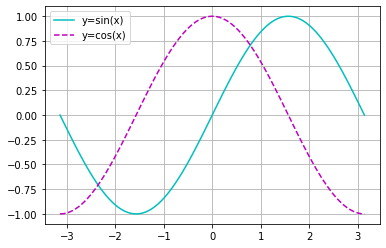

In [ ]:
# то что должно получиться

### Задание 2 (0.5 балла)

Прочитайте средствами pandas файл с данными кредитного скоринга. Рассмотрите сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [4]:
# ваш код здесь
data = pd.read_csv(GERMAN_CREDIT)
data.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good


In [5]:
df1 = pd.DataFrame(data.query('credit_risk == "good"').groupby('status')['number_credits'].count()).reset_index()
df2 = pd.DataFrame(data.query('credit_risk == "bad"').groupby('status')['number_credits'].count()).reset_index()

In [6]:
df1

,status,number_credits
0,... < 0 DM,164
1,... >= 200 DM / salary for at least 1 year,348
2,0<= ... < 200 DM,49
3,no checking account,139


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


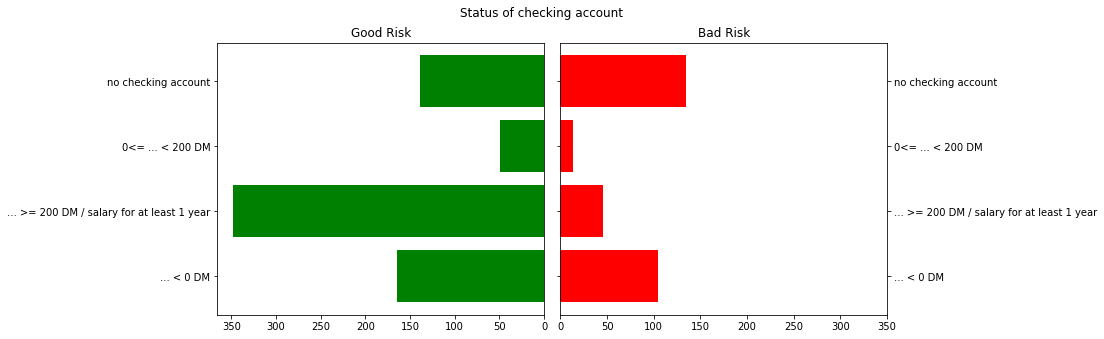

In [7]:
categories = df1['status'].unique() # для подписей статусов

df1['number_credits_min'] = -df1['number_credits'] # отрицательные значения для good risks

y_pos = np.arange(df1['status'].nunique()) # кол-во статусов

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True) 

# левая часть
ax1.barh(y_pos, df1['number_credits_min'], color='green', align='center')
ax1.set_yticks(y_pos) # засечки на оси Y 
ax1.set_yticklabels(df1['status']) # подписи
ax1.set_title('Good Risk') # заголовок

# чтобы циферки были не отрицательными
xticks = ax1.get_xticks() 
ax1.set_xticklabels([f'{abs(int(x))}' for x in xticks])

# правая часть
ax2.barh(y_pos, df2['number_credits'], color='red', align='center')
# ax2.set_yticks(y_pos)
ax2.set_yticklabels(df2['status'])
ax2.set_title('Bad Risk')
ax2.set_xlim(0,350)
ax2.tick_params(axis='y', which='both', labelleft=False, labelright=True, right=True) # чтобы засечки и подписи были справа

fig.suptitle('Status of checking account')
plt.subplots_adjust(wspace=0.05) # расстояние между графиками
plt.show() 

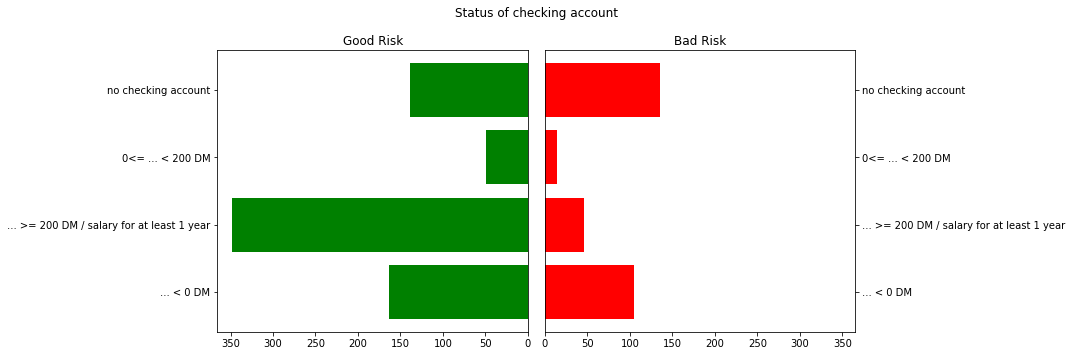

In [ ]:
# то что должно получиться

### Задание 3  (0.5 балла)

In [8]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<div class="alert alert-info">

C помощью seaborn графики строятся легче и лично мне их читать легче. 
В первом способе смущает, что зеленые столбцы как будто отрицательные, поскольку идут справа налево. В графике ниже информация воспринимается удобнее и понят нее

</div>

In [9]:
df = pd.DataFrame(data.groupby(['savings', 'credit_risk'])['number_credits'].count()).reset_index()

order = df.groupby('savings')['number_credits'].sum().sort_values(ascending=False).index

df['savings_ord'] = pd.Categorical(df['savings'], categories=order, ordered=True)
df = df.sort_values('savings_ord')
df = df.sort_values('credit_risk', ascending=False)
df

,savings,credit_risk,number_credits,savings_ord
9,unknown/no savings account,good,386,unknown/no savings account
3,... >= 1000 DM,good,151,... >= 1000 DM
1,... < 100 DM,good,69,... < 100 DM
5,100 <= ... < 500 DM,good,52,100 <= ... < 500 DM
7,500 <= ... < 1000 DM,good,42,500 <= ... < 1000 DM
8,unknown/no savings account,bad,217,unknown/no savings account
2,... >= 1000 DM,bad,32,... >= 1000 DM
0,... < 100 DM,bad,34,... < 100 DM
4,100 <= ... < 500 DM,bad,11,100 <= ... < 500 DM
6,500 <= ... < 1000 DM,bad,6,500 <= ... < 1000 DM


<AxesSubplot:xlabel='savings_ord', ylabel='number_credits'>

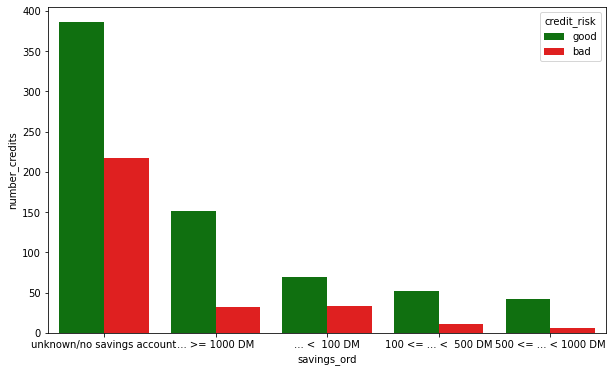

In [10]:
# ваш код здесь

plt.figure(figsize=(10, 6))
sns.barplot(y='number_credits', x='savings_ord', hue='credit_risk', data=df, palette={'good': 'green', 'bad': 'red'})

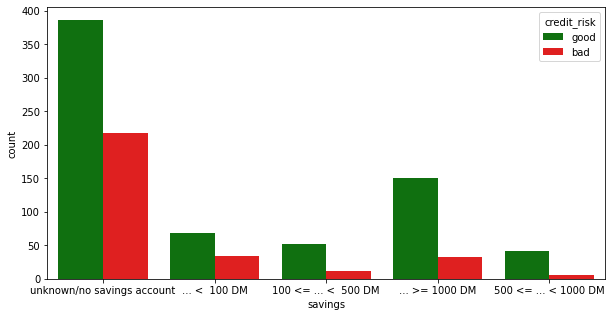

In [ ]:
# то что должно получиться

### Задание 4  (0.5 балла)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

In [11]:
df3 = pd.DataFrame(data.groupby(['savings', 'credit_risk', 'age'])['number_credits'].count()).reset_index()

order = df3.groupby('savings')['number_credits'].sum().sort_values(ascending=False).index

df3['savings_ord'] = pd.Categorical(df3['savings'], categories=order, ordered=True)
df3 = df3.sort_values('savings_ord')
df3 = df3.sort_values('credit_risk', ascending=False)
df3.head()

,savings,credit_risk,age,number_credits,savings_ord
285,unknown/no savings account,good,75,1,unknown/no savings account
30,... < 100 DM,good,28,3,... < 100 DM
32,... < 100 DM,good,30,5,... < 100 DM
33,... < 100 DM,good,31,6,... < 100 DM
34,... < 100 DM,good,32,3,... < 100 DM


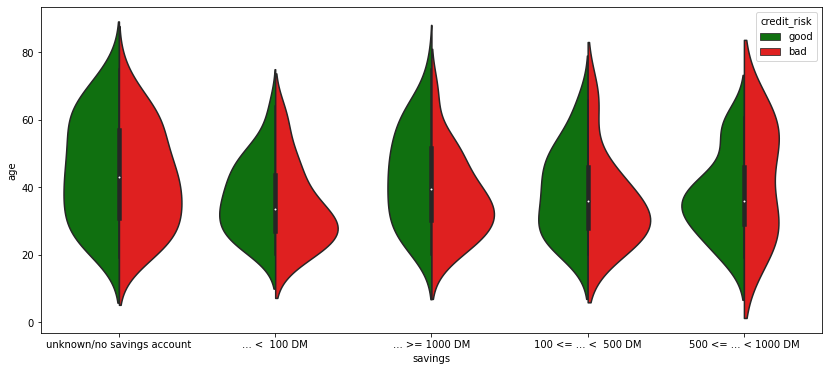

In [12]:
# ваш код здесь
plt.figure(figsize=(14,6))
sns.violinplot(x='savings', y='age', data=df3, hue='credit_risk', split=True, palette={'good': 'green', 'bad': 'red'});

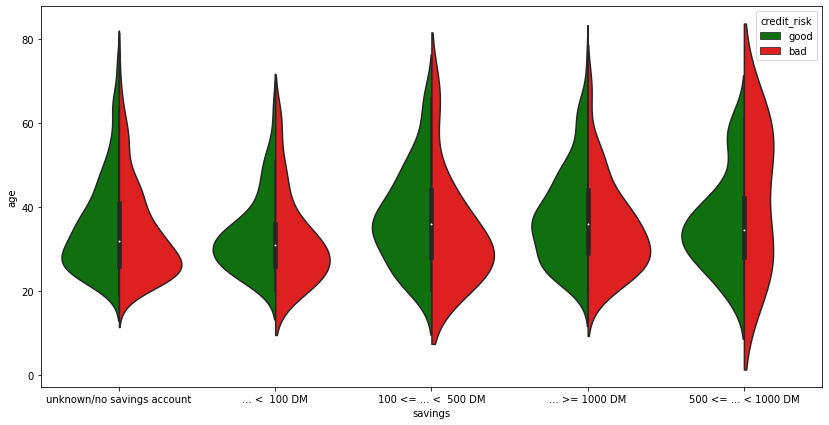

In [ ]:
# то что должно получиться

### Задание 5  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [13]:
df4 = data[['credit_risk', 'age']]
df4.head()

,credit_risk,age
0,good,21
1,good,36
2,good,23
3,good,39
4,good,38


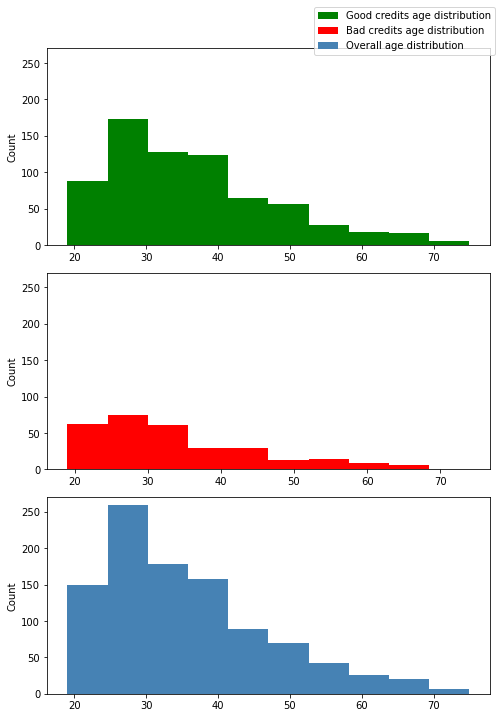

In [14]:
# ваш код здесь
fig, axs = plt.subplots(3, 1, figsize=(7, 10))

plt.subplot(3, 1, 1)
plt.hist(df4.query('credit_risk=="good"')['age'], bins=10, color='green')
plt.ylim(0, 270) # ограничение для оси 
plt.ylabel('Count')

plt.subplot(3, 1, 2)
plt.hist(df4.query('credit_risk=="bad"')['age'], bins=10, color='red')
plt.ylim(0, 270)
plt.ylabel('Count')

plt.subplot(3, 1, 3)
plt.hist(df4['age'], bins=10, color='steelblue')
plt.ylim(0, 270)
plt.ylabel('Count')

# легенда
fig.legend(['Good credits age distribution', 
            'Bad credits age distribution', 
            'Overall age distribution'], loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

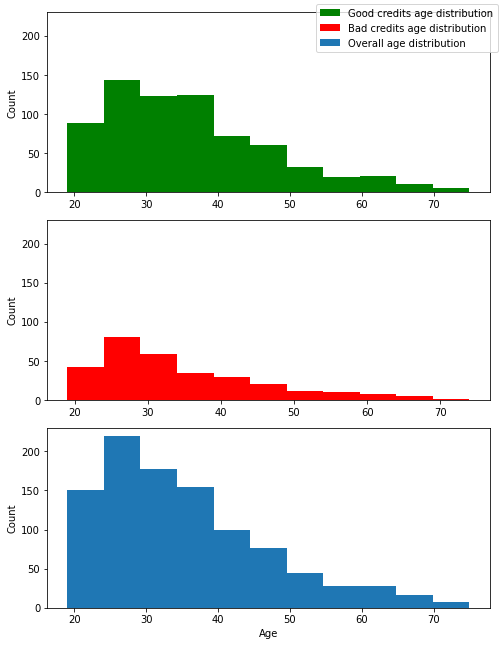

In [ ]:
# то что должно получиться

### Задание 6  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

In [15]:
# ваш код здесь
df5 = data[['duration', 'amount', 'credit_risk']]
df5.head()

,duration,amount,credit_risk
0,18,1049,good
1,9,2799,good
2,12,841,good
3,12,2122,good
4,12,2171,good


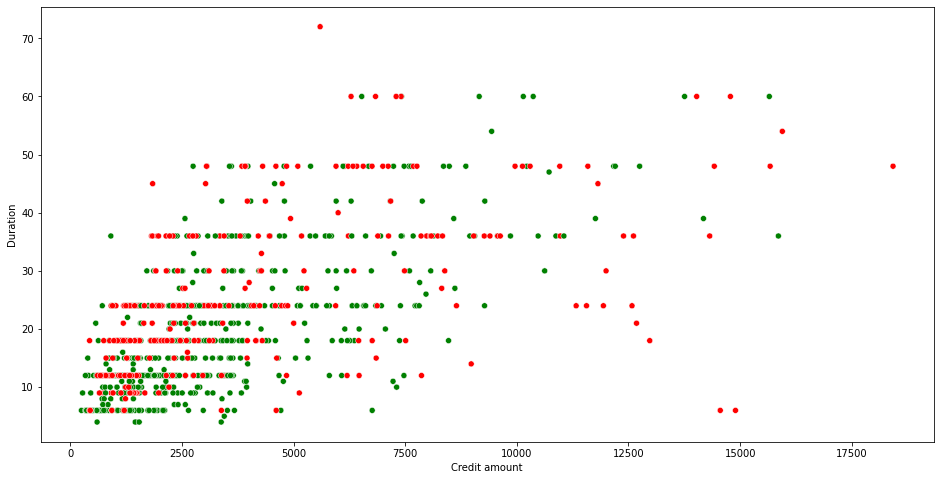

In [16]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df5, x='amount', y='duration', hue='credit_risk', palette={'good': 'green', 'bad': 'red'}, legend=False)
plt.ylabel('Duration')
plt.xlabel('Credit amount')
plt.show()

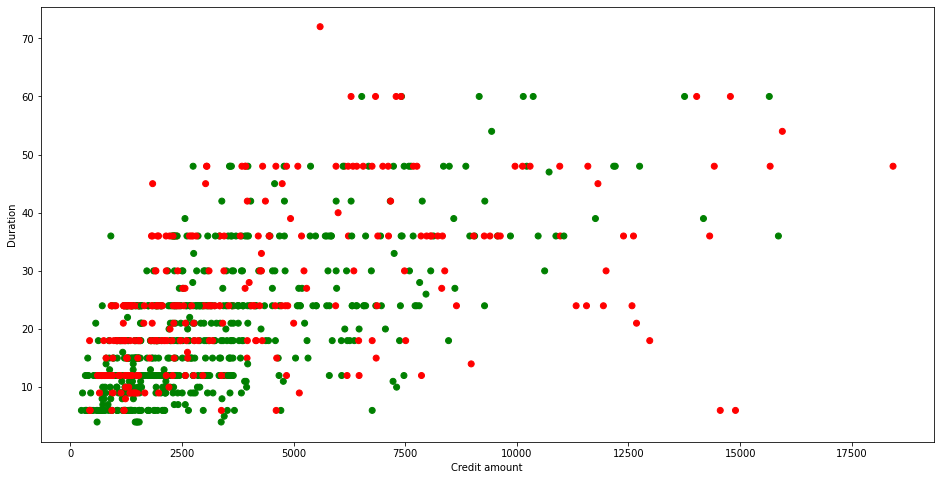

In [ ]:
# то что должно получиться

### Задание 7  (0.5 балла)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [17]:
# ваш код здесь
df7_g = data[['duration', 'amount', 'credit_risk', 'age']].query('credit_risk=="good"')
df7_b = data[['duration', 'amount', 'credit_risk', 'age']].query('credit_risk=="bad"')

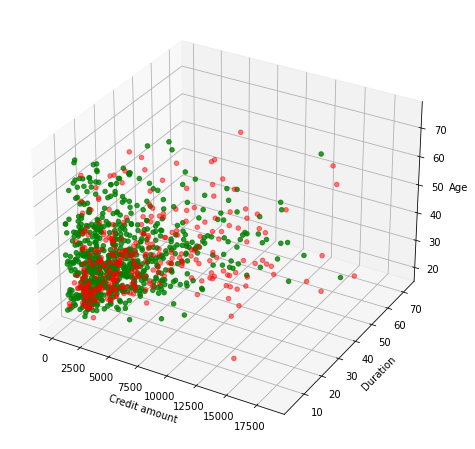

In [18]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df7_b['amount'], df7_b['duration'], df7_b['age'], c='red', label='Bad Credits', alpha=0.5)
ax.scatter(df7_g['amount'], df7_g['duration'], df7_g['age'], c='green', label='Good Credits', alpha=0.8)

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

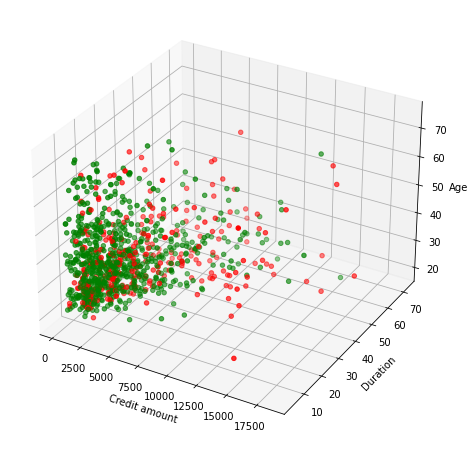

In [ ]:
# то что должно получиться

Что вы можете сказать о сравнении 3D- и 2D-визуализаций? Какие вы видите в них преимущества и недостатки?

Какие выводы с точки зрения бизнеса можно сделать из полученного графика?

<div class="alert alert-info">
<h3> Пояснение </h3> 

Главное преимущество 3D графика, как мне кажется, в возможности добавить третью переменную. Но для восприятия 3D графики гораздо сложнее: нужно вникать и очень внимательно его анализировать, чтобы сделать правильные выводы.
    
2D не позволяет добавлять третью переменную, но более проста в интерпретации

<b>Выводы в данном случае: </b>
- больше всего положительных кейсов при небольшом размере кредита и небольшой длительности 
- кредитов на очень длительный срок и большую сумму не так много, среди них положительные и отрицательные риски распределены примерно поровну
- чем старше - тем меньше кредитов
    
<b>Для бизнеса</b>
- продвигать небольшие кредиты на не очень большие сроки 
- ца - люди до 40

</div>

## Раздел 2. Визуализации в датасете Netflix

В данном разделе вы продолжите практиковаться в визуализациях и поработаете с более сложными графиками и инструментами.

Все технические рекомендации остаются неизменными с прошлого раздела.

In [19]:
NETFLIX_TITLES = 'https://github.com/evgpat/datasets/raw/refs/heads/main/netflix_titles.csv'

### Задание 1  (0.5 балла)

Прочитайте средствами pandas файл с данными Netflix. Посчитайте количество пропусков (NaN) в колонке `director`. Постройте столбчатую диаграмму, которая показывает 5 стран, в которых наибольшее количество фильмов содержат пропуски в столбце `director`.

Добавьте на диаграмму:

- Заголовок жирным шрифтом
- Подписи осей

In [20]:
netflix = pd.read_csv(NETFLIX_TITLES)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [21]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [22]:
# кол-во пропусков в столбце director
netflix['director'].isna().sum()

2389

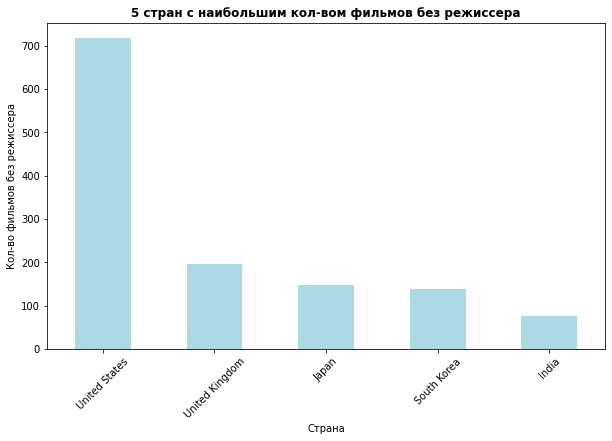

In [23]:
# Постройте столбчатую диаграмму, которая показывает 5 стран, 
# в которых наибольшее количество фильмов содержат пропуски в столбце director

df1_n = netflix[netflix['director'].isnull()].groupby('country').size()

top_countries = df1_n.nlargest(5) # топ-5 стран

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='lightblue')
plt.title('5 стран с наибольшим кол-вом фильмов без режиссера', fontweight='bold')
plt.xlabel('Страна')
plt.ylabel('Кол-во фильмов без режиссера')
plt.xticks(rotation=45)
plt.show()

### Задание 2 (0.5 балла)

Постройте pie chart (круговую диаграмму), показывающую 5 стран, в которых произвели больше всего фильмов.

Добавьте на диаграмму:

+ Заголовок (Тип шрифта: ``family = 'monospace'``, насыщенность: ``fontweight='bold'``)
+ Название стран (Тип шрифта: ``family = 'monospace'``)
+ Подписи значений (%) (Тип шрифта: ``family = 'monospace'``)
+ Выберите стиль для диаграммы pastel c помощью библиотеки ``seaborn``

```colors = sns.color_palette('pastel')[0:5]```

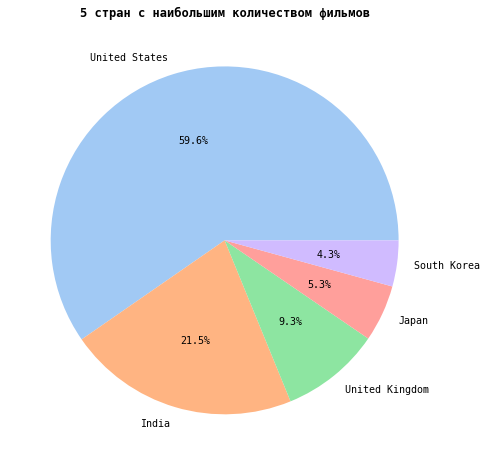

In [24]:
# ваш код здесь
country_counts = netflix['country'].value_counts()

top_countries = country_counts.nlargest(5)

colors = sns.color_palette('pastel')[0:5] 

plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', colors=colors)

plt.title('5 стран с наибольшим количеством фильмов', fontfamily='monospace', fontweight='bold')
plt.setp(plt.gca().texts, family='monospace')

plt.show()

### Задание 3 (1 балл)

Постройте subplots, где на первом графике будет круговая диаграмма, показывающая долю фильмов каждого рейтинга *(rating)*, а на втором столбчатая диаграмма, показывающая 3 страны, в которых было снято больше всего фильмов с рейтингом TV-MA.

*Если фильмов в каких-то рейтингах меньше 50, то их в график брать не нужно.*

Добавьте на диаграммы:

+ Заголовки (можно жирным)

Круговая диаграмма:
+ Подписи значений абсолютные

Столбчатая диаграммма:
+ Сделайте так, чтобы ось Y была справа
+ Добавьте подпись «Количество фильмов» к оси Y и уберите подпись к оси X
+ Оставьте видимыми только правую и нижнюю границы

In [25]:
rating_counts = netflix['rating'].value_counts()
rating_counts = rating_counts[rating_counts >= 50]

rating_counts

TV-MA    2863
TV-14    1931
TV-PG     806
R         665
PG-13     386
TV-Y      280
TV-Y7     271
PG        247
TV-G      194
NR         84
Name: rating, dtype: int64

In [26]:
tv_ma_count = netflix[netflix['rating'] == 'TV-MA']['country'].value_counts().nlargest(3)
tv_ma_count

United States     880
India             228
United Kingdom    168
Name: country, dtype: int64

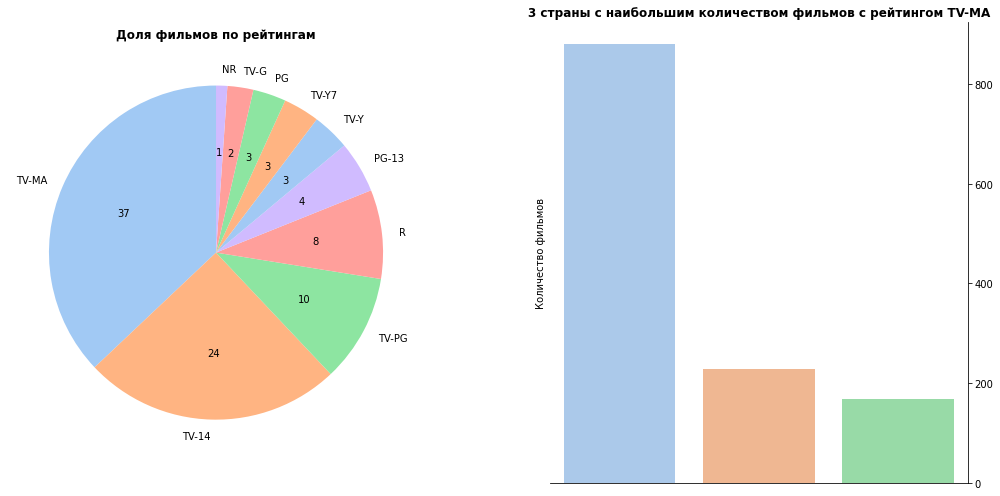

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

colors = sns.color_palette('pastel')[0:5] 

axs[0].pie(rating_counts, labels=rating_counts.index, autopct='%d', startangle=90, colors=colors)
axs[0].set_title('Доля фильмов по рейтингам', fontweight='bold')

sns.barplot(x=tv_ma_count.index, y=tv_ma_count.values, ax=axs[1], palette='pastel')
axs[1].set_ylabel('Количество фильмов')
axs[1].set_title('3 страны с наибольшим количеством фильмов с рейтингом TV-MA', fontweight='bold')

axs[1].yaxis.tick_right()
axs[1].xaxis.set_visible(False)  
axs[1].spines['top'].set_visible(False)  # верхняя граница
axs[1].spines['left'].set_visible(False) # левая граница
axs[1].spines['right'].set_visible(True) # правая граница
axs[1].spines['bottom'].set_visible(True)# нижняя граница

plt.tight_layout()
plt.subplots_adjust(wspace=0.3) # расстояние между графиками
plt.show()

### Задание 4 (1 балл)

Преобразуйте колонку `date_added` в datetime. Создайте новые столбцы month и year из преобразованного столбца. Постройте линейный график: сколько в среднем фильмов было снято в каждый из месяцев.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Маркеры на точках перегиба
+ Настройте ось X: ось начинается с 1 заканчивается 12, шаг 1

In [28]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['month'] = netflix['date_added'].dt.month
netflix['year'] = netflix['date_added'].dt.year

monthly = netflix.groupby('month').size().reset_index(name='count')

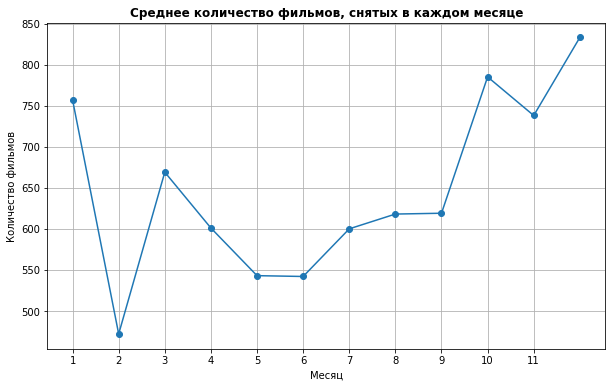

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(monthly['month'], monthly['count'], marker='o')

plt.title('Среднее количество фильмов, снятых в каждом месяце', fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Количество фильмов')
plt.xticks(range(1, 12))
plt.grid()

plt.show()

### Задание 5 (1 балл)

Постройте линейный график, в какие годы (столбец year, который вы создали в задании 4) сколько фильмов было снято.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Измените цвет линии графика и сделайте ее пунктиром
+ Решетку на фон

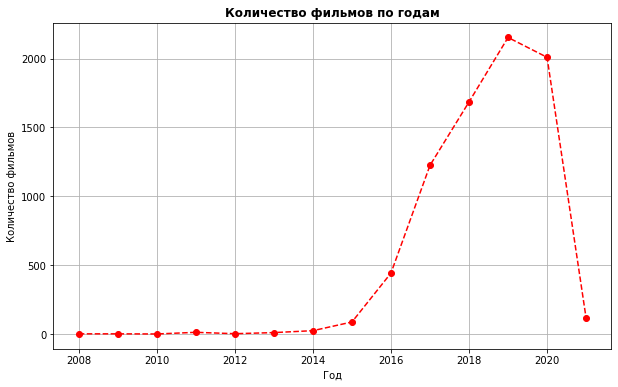

In [30]:
yearly = netflix.groupby('year').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.plot(yearly['year'], yearly['count'], marker='o', color='red', linestyle='--')

plt.title('Количество фильмов по годам', fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.grid()

plt.show()

### Задание 6 (1 балл)

Будем работать со столбцом duration. Одни данные даны в минутах (для фильмов (Movie)), а другие в сезонах (для сериалов (TV shows)). Создайте два новых столбца min (для тех, у кого продолжительность в минутах) и season (для тех, у кого продолжительность в сезонах), в которых будут извлечены данные из столбца duration.

Постройте subplots, где на первом графике гистрограмма распределения продолжительности фильмов, а на втором – гистрограмма распределения продолжительности сериалов.

Добавьте на графики:

+ Заголовки жирным шрифтом
+ Подписи осей

In [31]:
netflix['min'] = netflix['duration'].apply(lambda x: int(x.split(' ')[0]) if 'min' in x else None)

In [32]:
netflix['season'] = netflix['duration'].apply(lambda x: int(x.split(' ')[0]) if 'Seasons' in x else None)

In [33]:
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year,min,season
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8.0,2020.0,NaN,4.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12.0,2016.0,93.0,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12.0,2018.0,78.0,NaN


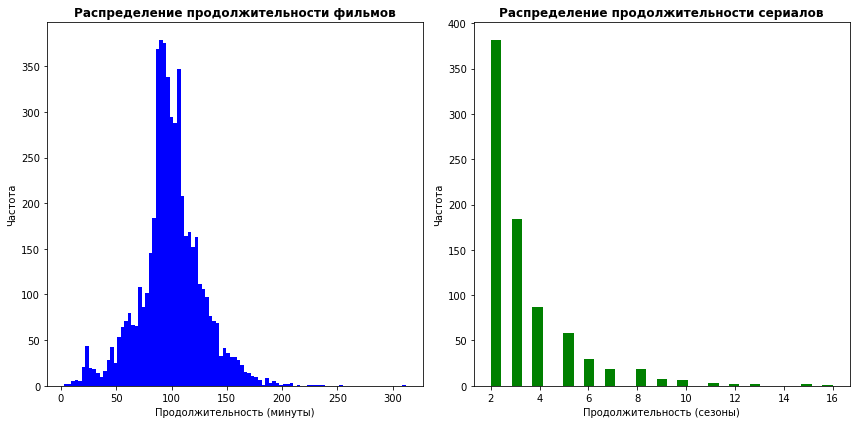

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Гистограмма для фильмов
axs[0].hist(netflix['min'].dropna(), bins='auto', color='blue')
axs[0].set_title('Распределение продолжительности фильмов', fontweight='bold')
axs[0].set_xlabel('Продолжительность (минуты)')
axs[0].set_ylabel('Частота')

# Гистограмма для сериалов
axs[1].hist(netflix['season'].dropna(), bins='auto', color='green')
axs[1].set_title('Распределение продолжительности сериалов', fontweight='bold')
axs[1].set_xlabel('Продолжительность (сезоны)')
axs[1].set_ylabel('Частота')

# Показать графики
plt.tight_layout()
plt.show()

### Задание 7 (0.5 балла)

Постройте ящик с усами (box plot) по продолжительности фильмов (Movies). Визуально проинтерпретируйте его.

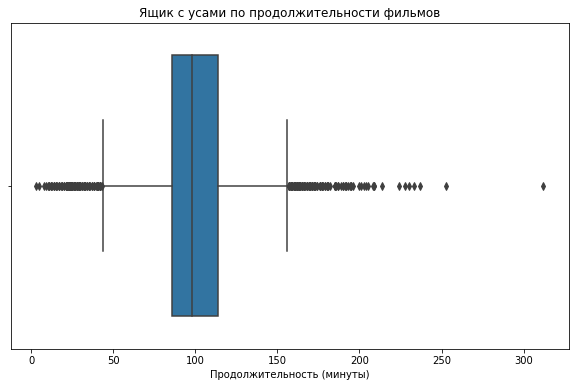

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=netflix['min'])
plt.title('Ящик с усами по продолжительности фильмов')
plt.xlabel('Продолжительность (минуты)')
plt.show()

<div class="alert alert-info">
<h3> Интерпретация </h3> 

- медиана - в районе 100 минут, чуть смещена влево => есть большие значения, тянущие среднее вверх
- есть выбросы с обеих сторон
- минимальное (не экстремальное значение) - чуть меньше 50, максимальное (не экстремальное) - чуть больше 150

</div>

### Задание 8* (1 балл)

Постройте при помощи библиотеки plotly интерактивную столбчатую диаграмму, которая сравнивает среднюю продолжительность фильмов и сериалов за каждый год, начиная с 2000.

In [36]:
average_duration = netflix.groupby(['year', 'type'])[['min', 'season']].mean().reset_index()
average_duration.head()

,year,type,min,season
0,2008.0,Movie,81.000000,NaN
1,2008.0,TV Show,NaN,NaN
2,2009.0,Movie,66.500000,NaN
3,2010.0,Movie,84.000000,NaN
4,2011.0,Movie,93.461538,NaN


In [28]:
import plotly.express as px

In [32]:
# fig = px.bar(average_duration, 
#              x='year', 
#              y=['min', 'season'], 
#              color='type', 
#              barmode='group',
#              title='Средняя продолжительность фильмов и сериалов по годам',
#              labels={'duration': 'Средняя продолжительность (минуты)', 'year': 'Год'})

# fig.show()

ноутбук не сохраняется, если не закомментить этот график